In [30]:
import sys
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# # === BƯỚC 1: TẠO DỮ LIỆU MẪU ===
# np.random.seed(42)
# X = 2 * np.random.rand(100, 1)  # 100 điểm, 1 đặc trưng
# y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + nhiễu

In [2]:
df = pd.read_csv('/kaggle/input/housing/housing.csv') #gọi từ datasets

In [4]:
df = df.dropna()

In [5]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [8]:
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# === BƯỚC 2: HUẤN LUYỆN MÔ HÌNH ===
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# In các hệ số học được
print(f"Hệ số chặn (Intercept): {model.intercept_:.2f}")
print("\nCác hệ số góc (Coefficients):")
coef_df = pd.DataFrame({'Đặc trưng': X.columns, 'Trọng số': model.coef_})
print(coef_df.sort_values(by='Trọng số', ascending=False))

Hệ số chặn (Intercept): -2299273.76

Các hệ số góc (Coefficients):
                     Đặc trưng       Trọng số
9       ocean_proximity_ISLAND  213653.374463
7                median_income   39277.083020
11  ocean_proximity_NEAR OCEAN    3166.477128
2           housing_median_age    1081.364206
4               total_bedrooms     103.004042
6                   households      43.142725
3                  total_rooms      -6.322146
5                   population     -36.409751
10    ocean_proximity_NEAR BAY   -6232.416876
1                     latitude  -25657.807543
0                    longitude  -27108.746321
8       ocean_proximity_INLAND  -39240.217778


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
# 1. In hệ số chặn (B0 - Intercept)
print(f"Hệ số chặn (B0): {model.intercept_:.2f}")

coef_df = pd.DataFrame({
    'Tên cột (Feature)': X.columns,
    'Hệ số (Weight)': model.coef_
})

coef_df = coef_df.sort_values(by='Hệ số (Weight)', ascending=False)

print("\nBảng các hệ số (B1, B2...):")
print(coef_df)

Hệ số chặn (B0): -2299273.76

Bảng các hệ số (B1, B2...):
             Tên cột (Feature)  Hệ số (Weight)
9       ocean_proximity_ISLAND   213653.374463
7                median_income    39277.083020
11  ocean_proximity_NEAR OCEAN     3166.477128
2           housing_median_age     1081.364206
4               total_bedrooms      103.004042
6                   households       43.142725
3                  total_rooms       -6.322146
5                   population      -36.409751
10    ocean_proximity_NEAR BAY    -6232.416876
1                     latitude   -25657.807543
0                    longitude   -27108.746321
8       ocean_proximity_INLAND   -39240.217778


# **Dự Đoán**

In [14]:
y_pred = model.predict(X_test)

In [17]:
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [18]:
print(f"\n=== KẾT QUẢ ĐÁNH GIÁ ===")
print(f"R^2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


=== KẾT QUẢ ĐÁNH GIÁ ===
R^2 Score: 0.6488
RMSE: 69297.7167
MAE: 50413.4333


In [22]:
import matplotlib.pyplot as plt

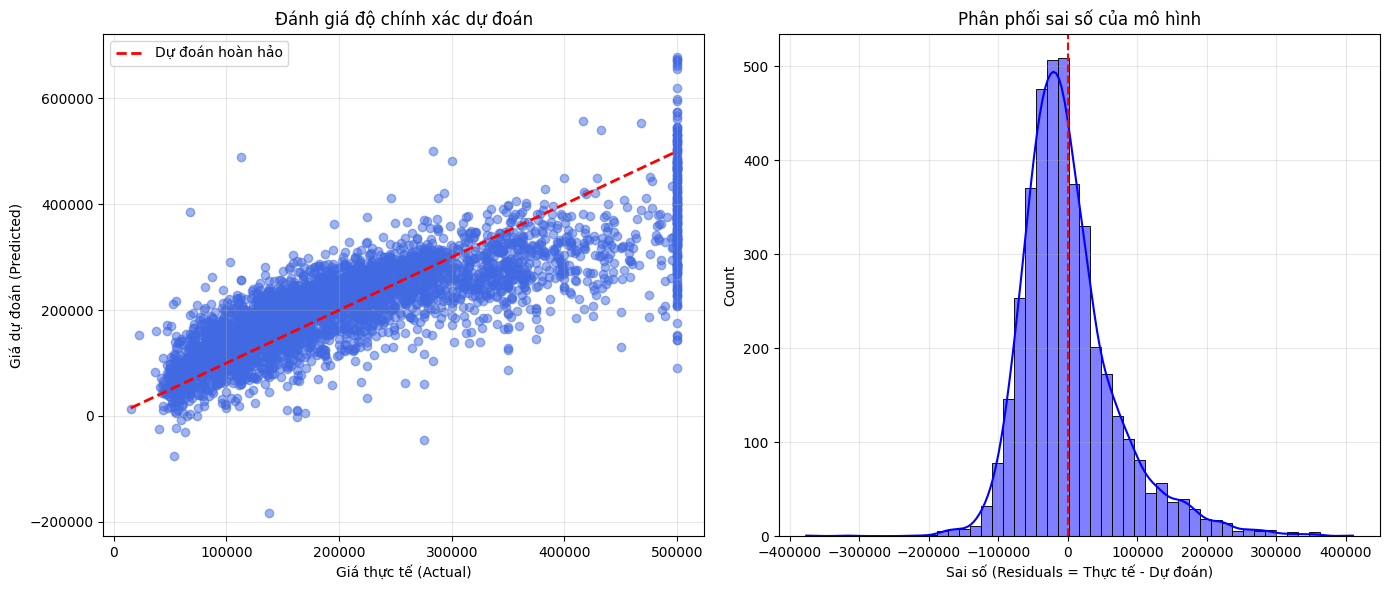

In [26]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
# Vẽ đường chéo đỏ thể hiện sự dự đoán hoàn hảo
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Dự đoán hoàn hảo')
plt.xlabel('Giá thực tế (Actual)')
plt.ylabel('Giá dự đoán (Predicted)')
plt.title('Đánh giá độ chính xác dự đoán')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Biểu đồ phân phối Sai số (Residuals)
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=50, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Sai số (Residuals = Thực tế - Dự đoán)')
plt.title('Phân phối sai số của mô hình')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
# === BƯỚC 5: DỰ ĐOÁN CHO DỮ LIỆU MỚI (New Data Prediction) ===
feature_names = X.columns.tolist()
print("Mô hình đang mong đợi các thông tin sau:", feature_names)
new_house_data = {
    'longitude': -122.23,
    'latitude': 37.88,
    'housing_median_age': 5,
    'total_rooms': 1000,
    'total_bedrooms': 200,
    'population': 500,
    'households': 150,
    'median_income': 8.0,

    'ocean_proximity_INLAND': 0,
    'ocean_proximity_ISLAND': 0,
    'ocean_proximity_NEAR BAY': 1,
    'ocean_proximity_NEAR OCEAN': 0
}

new_df = pd.DataFrame([new_house_data])
new_df = new_df[feature_names]

# 4. Dự đoán
predicted_price = model.predict(new_df)

print(f"\n=== DỰ ĐOÁN GIÁ NHÀ MỚI ===")
print(f"Thông số căn nhà: \n{new_df.iloc[0].to_dict()}")
print(f"------------------------------------------------")
print(f"Giá dự đoán: ${predicted_price[0]:,.2f}")

Mô hình đang mong đợi các thông tin sau: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

=== DỰ ĐOÁN GIÁ NHÀ MỚI ===
Thông số căn nhà: 
{'longitude': -122.23, 'latitude': 37.88, 'housing_median_age': 5.0, 'total_rooms': 1000.0, 'total_bedrooms': 200.0, 'population': 500.0, 'households': 150.0, 'median_income': 8.0, 'ocean_proximity_INLAND': 0.0, 'ocean_proximity_ISLAND': 0.0, 'ocean_proximity_NEAR BAY': 1.0, 'ocean_proximity_NEAR OCEAN': 0.0}
------------------------------------------------
Giá dự đoán: $358,246.82


# Pytorch

In [35]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

input_dim = X_train.shape[1]
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [32]:
# === BƯỚC 1: XỬ LÝ DỮ LIỆU (DATA PREPARATION) ===
df = pd.read_csv('/kaggle/input/housing/housing.csv')
df = df.dropna()
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [34]:
# Tách X và y
X_raw = df.drop('median_house_value', axis=1).values
y_raw = df['median_house_value'].values.reshape(-1, 1)

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_x.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [36]:
# === BƯỚC 3: THIẾT LẬP LOSS VÀ OPTIMIZER ===
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [37]:
# === BƯỚC 4: HUẤN LUYỆN (TRAINING LOOP) ===
num_epochs = 2000 # Số lần học
train_losses = []

print("Bắt đầu huấn luyện...")
for epoch in range(num_epochs):
    # 1. Forward pass: Dự đoán
    y_pred = model(X_train)

    # 2. Tính lỗi (Loss)
    loss = criterion(y_pred, y_train)
    train_losses.append(loss.item())

    # 3. Backward pass: Tính đạo hàm và cập nhật trọng số
    optimizer.zero_grad() # Xóa đạo hàm cũ
    loss.backward()       # Tính đạo hàm mới
    optimizer.step()      # Cập nhật W và b

    if (epoch+1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Bắt đầu huấn luyện...
Epoch [200/2000], Loss: 0.3538
Epoch [400/2000], Loss: 0.3523
Epoch [600/2000], Loss: 0.3521
Epoch [800/2000], Loss: 0.3520
Epoch [1000/2000], Loss: 0.3520
Epoch [1200/2000], Loss: 0.3520
Epoch [1400/2000], Loss: 0.3520
Epoch [1600/2000], Loss: 0.3520
Epoch [1800/2000], Loss: 0.3520
Epoch [2000/2000], Loss: 0.3520


In [39]:
# === BƯỚC 5: ĐÁNH GIÁ (EVALUATION) ===
model.eval() # Chuyển sang chế độ đánh giá
with torch.no_grad(): # Tắt tính đạo hàm cho nhẹ máy
    y_pred_tensor = model(X_test)

    # Chuyển ngược từ Tensor scaled về giá trị thực (USD) để đánh giá
    y_pred_real = scaler_y.inverse_transform(y_pred_tensor.numpy())
    y_test_real = scaler_y.inverse_transform(y_test.numpy())

# Tính các chỉ số
r2 = r2_score(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

In [40]:
print(f"\n=== KẾT QUẢ PYTORCH ===")
print(f"R^2 Score: {r2:.4f}")
print(f"RMSE: {rmse:,.2f}")


=== KẾT QUẢ PYTORCH ===
R^2 Score: 0.6488
RMSE: 69,297.72


In [42]:
# === BỔ SUNG: IN THAM SỐ W VÀ b ĐÃ HỌC ===

print("\n=== THAM SỐ ĐÃ HỌC (LEARNED PARAMETERS) ===")

# 1. In Bias (b) - Hệ số chặn
print(f"Learned b: {model.linear.bias.item():.4f}")

# 2. In Weights (W) - Các hệ số góc
weights = model.linear.weight.detach().numpy()[0]

print("Learned W:")

feature_names = df.drop('median_house_value', axis=1).columns 

for i, (w, name) in enumerate(zip(weights, feature_names)):
    print(f"  {name}: {w:.4f}")


=== THAM SỐ ĐÃ HỌC (LEARNED PARAMETERS) ===
Learned b: -0.0026
Learned W:
  longitude: -0.4705
  latitude: -0.4748
  housing_median_age: 0.1180
  total_rooms: -0.1197
  total_bedrooms: 0.3760
  population: -0.3574
  households: 0.1429
  median_income: 0.6462
  ocean_proximity_INLAND: -0.1583
  ocean_proximity_ISLAND: 0.0289
  ocean_proximity_NEAR BAY: -0.0170
  ocean_proximity_NEAR OCEAN: 0.0092


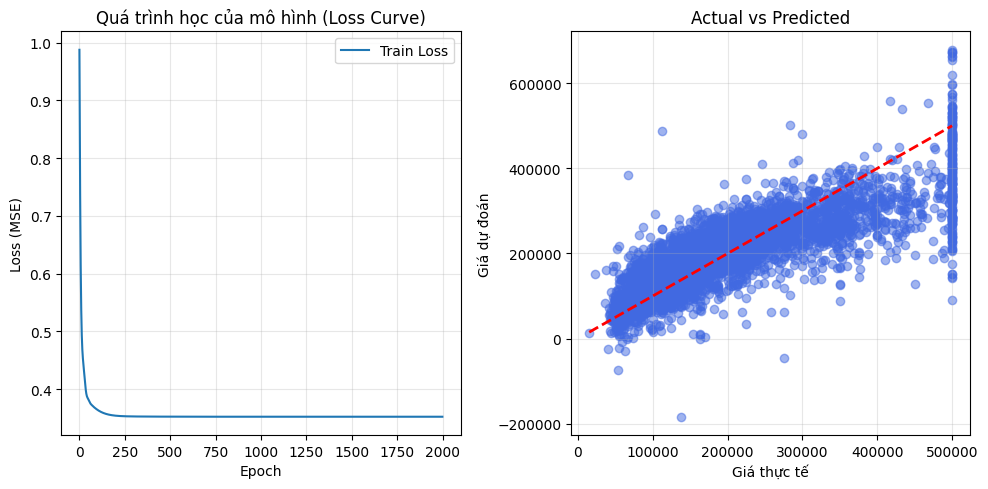


Giá dự đoán cho căn nhà mới: $358,246.69


In [41]:
# === BƯỚC 6: TRỰC QUAN HÓA ===
plt.figure(figsize=(15, 5))

# Biểu đồ Loss giảm dần theo thời gian
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Quá trình học của mô hình (Loss Curve)')
plt.legend()
plt.grid(True, alpha=0.3)

# Biểu đồ Thực tế vs Dự đoán
plt.subplot(1, 3, 2)
plt.scatter(y_test_real, y_pred_real, alpha=0.5, color='royalblue')
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--', lw=2)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === DỰ ĐOÁN DỮ LIỆU MỚI ===
# Lấy lại ví dụ căn nhà cũ để test
new_data = np.array([[-122.23, 37.88, 5, 1000, 200, 500, 150, 8.0, 0, 0, 1, 0]])

# Phải scale dữ liệu mới giống hệt lúc train
new_data_scaled = scaler_x.transform(new_data)
new_tensor = torch.tensor(new_data_scaled, dtype=torch.float32)

with torch.no_grad():
    prediction_scaled = model(new_tensor)
    prediction_real = scaler_y.inverse_transform(prediction_scaled.numpy())

print(f"\nGiá dự đoán cho căn nhà mới: ${prediction_real[0][0]:,.2f}")